In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.Preprocessing import OneHotEncoding
from sklearn.Preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
# 1. Find the dataset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [ ]:
# 1. Find the datatypes:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,float64
Number_of_Vehicles,int64
Number_of_Casualties,float64
Date,object
Day_of_Week,int64


In [ ]:
# 2. Check the shape of the data to understand its structure:
df.shape

(52000, 26)

In [ ]:
# 3. View the the data with various functions to get an initial sense of the data:
df.sample(10)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
30894,458770.0,402600.0,-1.115131,53.516789,14,2.0,1,1.0,09/05/2011,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,Yes,2011
41193,368260.0,175940.0,-2.458485,51.481468,52,3.0,2,1.0,05/06/2006,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,No,2006
30944,549970.0,190940.0,0.163854,51.597293,1,3.0,2,1.0,05/08/2013,2,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,No,2013
7649,515560.0,191790.0,-0.332417,51.613037,1,3.0,2,1.0,11/01/2006,4,...,5,0,None within 50 metres,No physical crossing within 50 meters,NaN,Fine without high winds,Dry,1.0,Yes,2006
25473,323900.0,385250.0,-3.144931,53.358618,5,2.0,2,1.0,20/03/2011,1,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2011
44363,522030.0,168140.0,-0.247196,51.399121,1,3.0,2,1.0,16/06/2011,5,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2011
18941,435220.0,334740.0,-1.477751,52.908921,30,3.0,1,1.0,20/11/2014,5,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2014
8948,436388.0,112959.0,-1.483768,50.914891,44,2.0,1,1.0,07/03/2012,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2012
51862,410470.0,287360.0,-1.847261,52.484032,20,3.0,3,1.0,08/03/2006,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Other,Wet/Damp,1.0,Yes,2006
34191,341670.0,734400.0,-2.949077,56.498103,93,2.0,2,1.0,16/09/2011,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,NaN,Raining without high winds,Wet/Damp,2.0,Yes,2011


In [ ]:
# 4. Perform summary statistics on the dataset to grasp central tendencies and variability.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,52000.0,440284.256846,95109.751221,98480.000000,375540.000000,440950.000000,523500.000000,6.549600e+05
Location_Northing_OSGR,52000.0,299861.656788,161362.379650,19030.000000,178010.000000,267180.000000,398149.250000,1.203900e+06
Longitude,52000.0,-1.427193,1.398249,-6.895268,-2.366190,-1.391202,-0.214666,1.753632e+00
Latitude,52000.0,52.586684,1.453049,50.026153,51.487676,52.295042,53.478016,6.071477e+01
Police_Force,52000.0,30.401712,25.545581,1.000000,7.000000,30.000000,46.000000,9.800000e+01
Accident_Severity,51678.0,2.837145,0.402582,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,52000.0,1.834327,0.727856,1.000000,1.000000,2.000000,2.000000,3.400000e+01
Number_of_Casualties,50959.0,1.354756,0.855220,1.000000,1.000000,1.000000,1.000000,5.100000e+01
Day_of_Week,52000.0,4.130712,1.926217,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),52000.0,349.542558,259.504721,1.000000,112.000000,323.000000,530.000000,9.410000e+02


In [ ]:
# 5. Check for duplicated data:
df.duplicated().sum()

43

In [ ]:
# 6. Check for null values:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

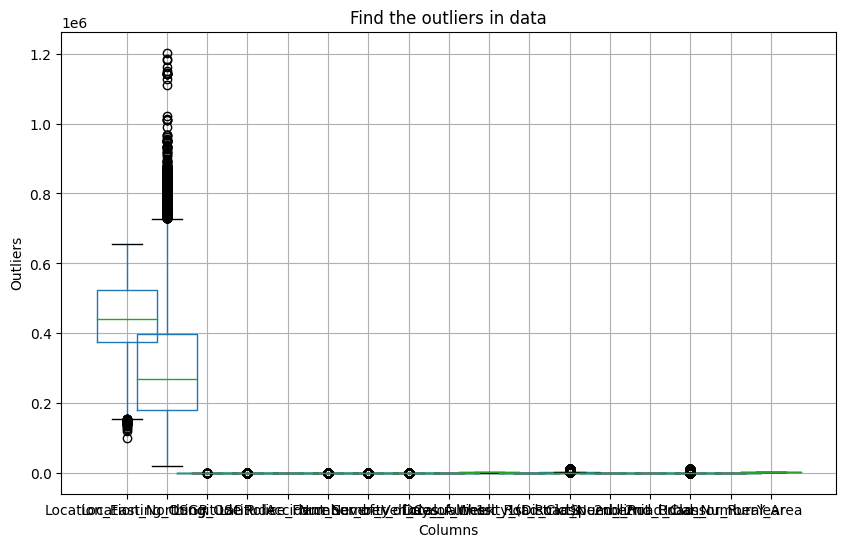

In [ ]:
# 1. Remove the outliers:
plt.figure(figsize=(10,6))
df.boxplot(widths=1.5)
plt.title("Find the outliers in data")
plt.xlabel("Columns")
plt.ylabel("Outliers")

plt.show()

### Find outliers in all data

All the outliers in data:
 Axes(0.125,0.11;0.775x0.77)


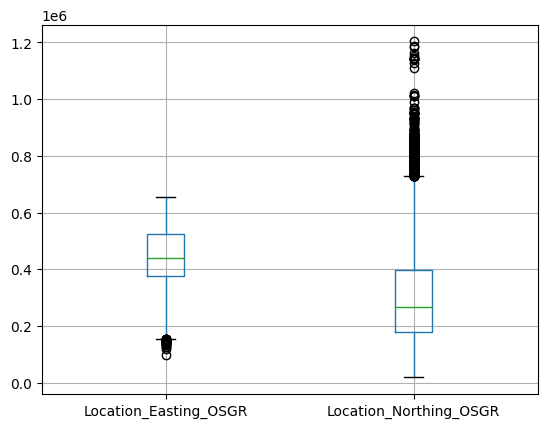

<Figure size 1000x600 with 0 Axes>

In [ ]:
# All the outliers in data:
boxplot = df.boxplot(column=['Location_Easting_OSGR', 'Location_Northing_OSGR'])

plt.figure(figsize=(10,6))
print("All the outliers in data:\n", boxplot)

In [ ]:
df['Location_Easting_OSGR'].value_counts(ascending= False)

,count
Location_Easting_OSGR,
531890.0,16
533650.0,15
531220.0,14
530980.0,13
533370.0,13
...,...
309450.0,1
575400.0,1
503208.0,1


In [ ]:
df['Location_Northing_OSGR'].value_counts(ascending= False)

,count
Location_Northing_OSGR,
181190.0,19
181310.0,17
180920.0,15
179690.0,15
181110.0,14
...,...
310945.0,1
489909.0,1
150650.0,1


In [ ]:
df['Location_Easting_OSGR'] = df(df['Location_Easting_OSGR'] >= 30000)
df['Location_Northing_OSGR'] = df(df['Location_Northing_OSGR'] <= 40000)

In [ ]:
# 2. Impute missing data: All culomns with null values : Accident_Severity, Number_of_Casualties, Light_Conditions, Urban_or_Rural_Area

df['Accident_Severity'].fillna(df['Accident_Severity'].mean())
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean())
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean())

,Urban_or_Rural_Area
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
51995,1.0
51996,2.0
51997,1.0
51998,1.0


In [ ]:
df['Light_Conditions'].value_counts()

,count
Light_Conditions,
Daylight: Street light present,37734
Darkness: Street lights present and lit,10130
Darkeness: No street lighting,2811
Darkness: Street lighting unknown,536
Darkness: Street lights present but unlit,245


In [ ]:
df['Light_Conditions'].dorpna(inplace= True)

In [ ]:
# 3. Scale the data:
Scaler = OneHotEncoder
Scaler_d = Scaler.fit_transform()

In [ ]:
# 4. Reduce dimentions using PCA:

pca = PCA(n_components= 3)
pca_data = pca.fit_transform(Scaler_d)

In [ ]:
# 5. Implement One-Hot Encoding for nominal categorical variables:

OneHotEncoding = OneHotEncoding()
# df['', ''].OneHotEncoding(df['', ''])

df['Date'] = df['Date'].OneHotEncoding()
df['Local_Authority_(Highway)'] = df['Local_Authority_(Highway)'].OneHotEncoding()
df['Road_Type'] = df['Road_Type'].OneHotEncoding()
df['Pedestrian_Crossing-Human_Control'] = df['Pedestrian_Crossing-Human_Control'].OneHotEncoding()
df['Pedestrian_Crossing-Physical_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].OneHotEncoding()
df['Light_Conditions'] = df['Light_Conditions'].OneHotEncoding()
df['Weather_Conditions'] = df['Weather_Conditions'].OneHotEncoding()
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].OneHotEncoding()
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].OneHotEncoding()
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].OneHotEncoding()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [ ]:
plt.figure(figsize(10,8))
plt.scatter(data=df, x= ['Longitude', 'Latitude'] hue= 'Accident_Severity')
plt.title("Scatter plot of accidents based on Longitude and Latitude:")
plt.xlabel(" ")
plt.ylabel(" ")

plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [ ]:
# 1. Find the n_clusters parameter using the elbow method:

intertia = []
for i in range(1,11):
  KMeans = KMeans(n_clusters= i, max_iter= 300, n_init= 10, random_state= 0)
  KMeans = KMeans.fit_transform(pca_data)
  intertia.append()

In [ ]:
# 2. Train the model:
KMeans = KMeans(n_clusters= ___ , random_state= 0)
KMeans = KMeans.fit_transform(pca_data)
lable = KMeans.lables_
center = KMeans.cluster_centers_


## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

In [ ]:
plt.figure(figsize(10,8))
plt.scatter(pca_data[:,0], pca_data[:,1], c= lable)
plt.scatter(__[:,0], __[:,1], c= 'red')
plt.title("Plot the data points with their predicted cluster center")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?